Proszę pobrać dowolny duży obraz. Otwórzmy go w pythonie w skali szarości i przekonwertujmy do numpy array.

Załóżmy że jego rozdzielczość to $m$ na $n$. Potraktujmy go jako $m$ wektorów $n$ wymiarowych.

Zredukujmy dane za pomocą SVD z $n$ wymiarów do $k$ wymiarów (proszę rozważyć różne $k$). 

Zrekonstruujmy teraz obraz z wymiaru $k$ do oryginalnego wymiaru i zobaczmy jak wyglądają.



Pobierazmy obraz i konwertujemy to numpy array

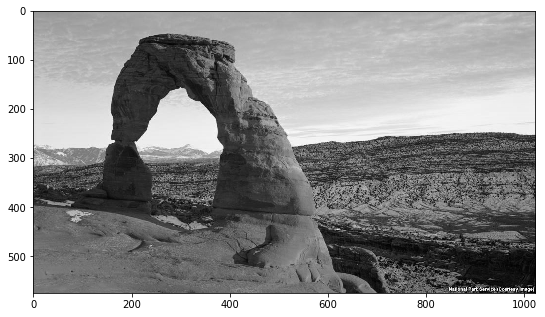

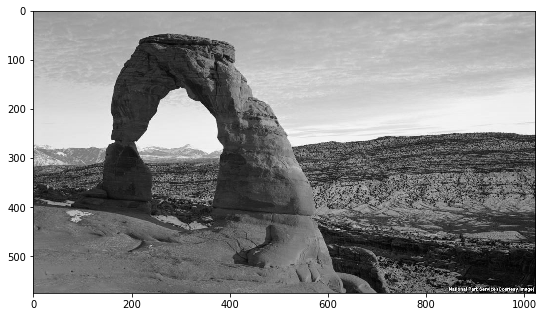

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

img = Image.open('datasets/test_image.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
#imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

Robimy SVD

In [87]:
U,s,VT = np.linalg.svd(imgmat)

In [88]:
print(U.shape)
print(s.shape)
print(VT.shape)

(575, 575)
(575,)
(1023, 1023)


In [89]:
n_components = 1
X=imgmat
vn = VT[100:n_components, :]
vn = vn.T
vn.shape

(1023, 0)

In [90]:
R = np.dot(X, vn)
R.shape

(575, 0)

In [91]:
Y = np.dot(R, vn.T)
Y.shape

(575, 1023)

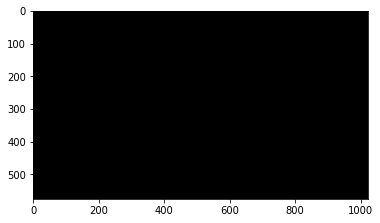

In [92]:
plt.imshow(Y, cmap='gray');

In [40]:
from sklearn.decomposition import TruncatedSVD

for i in range(100):
    svd = TruncatedSVD(n_components = i)
    svd.fit(X)
    print(i, " ", np.sum(svd.explained_variance_ratio_))
    

0   0.0
1   0.539777446366
2   0.718327944573
3   0.805871917856
4   0.839258123712
5   0.859135605859
6   0.870420195906
7   0.879250210236
8   0.887120521101
9   0.893715093799
10   0.899252305293
11   0.90387434448
12   0.908086200923
13   0.912007738082
14   0.915687998629
15   0.918770539868
16   0.921848978219
17   0.924358408653
18   0.926575357204
19   0.928604514374
20   0.930558267229
21   0.932415267517
22   0.934141512258
23   0.935811372551
24   0.937434861337
25   0.938960272876
26   0.940377285342
27   0.941706901742
28   0.943009692653
29   0.94425133869
30   0.945415596022
31   0.946572770532
32   0.947660747202
33   0.948667846177
34   0.949691857002
35   0.950640709841
36   0.951586103514
37   0.95250218623
38   0.953384663546
39   0.954257833563
40   0.955096458557
41   0.955880212385
42   0.956672039375
43   0.957434068034
44   0.958174252075
45   0.958868614688
46   0.959553634824
47   0.960213779417
48   0.960886731361
49   0.961511085302
50   0.962117820448
51  

array([ 0.53977745])

Rekonstruujemy w oparciu o 1 wektor własny

In [5]:
#

Czym jest jeden wektor własny. Czym jest rekonstrukcja w oparciu o 1 wektor? 

Tearz bierzemy rosnącą ilość komponentów i patrzymy ja się zmienia rekonstrukacja

In [6]:
#TODO

Proszę teraz potraktować obrazek jako zbiór kostek 8 na 8- czyli dostajemy wektor 64 wymiarowy. Dokonać tej samej procedury kompresji. Które podejście daje mniejszy błąd od oryginału używając tej samej ilości komponentów (dowolna odlegość po pikselach) - dlaczego?

In [45]:
X[:8,:8]

array([[ 151.,  151.,  150.,  150.,  150.,  150.,  151.,  151.],
       [ 151.,  150.,  150.,  150.,  150.,  150.,  150.,  151.],
       [ 150.,  150.,  149.,  149.,  149.,  149.,  150.,  150.],
       [ 150.,  150.,  149.,  149.,  149.,  149.,  150.,  150.],
       [ 150.,  150.,  149.,  149.,  149.,  149.,  150.,  150.],
       [ 151.,  151.,  150.,  150.,  150.,  150.,  151.,  151.],
       [ 152.,  152.,  151.,  151.,  151.,  151.,  152.,  152.],
       [ 153.,  153.,  152.,  152.,  152.,  152.,  153.,  153.]])

In [137]:
h_size = int(imgmat.shape[1]/8) * 8
v_size = int(imgmat.shape[0]/8)*8

X_save = imgmat[:v_size, :h_size]

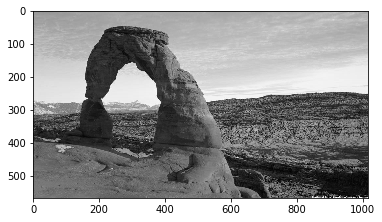

In [138]:
plt.imshow(X_save, cmap = 'gray')

In [156]:
PEAK = 0.05

X = np.random.poisson(X_save*0.7)

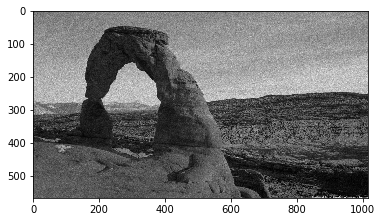

In [157]:
plt.imshow(noisy, cmap = 'gray')

In [158]:
X[:8,:8].flatten()

array([109,  94, 102,  97, 103, 113, 107, 101, 112, 108,  96,  78, 108,
        99, 108,  98, 132,  97, 100, 103,  91,  98, 104,  96,  93, 109,
        90,  98, 105,  92, 102, 110,  86, 101, 111, 111, 104,  95,  95,
       110, 115, 118, 108, 116, 113, 134, 110, 125, 103, 100, 122, 103,
       114, 125, 104, 103,  96, 105,  97, 103,  97,  96, 108, 120])

In [159]:
res = np.zeros((int(X.shape[0]*X.shape[1] / 64), 64))

In [160]:
res.shape

(9017, 64)

In [161]:
licz = 0
for i in range(0,X.shape[0],8):
    for j in range(0,X.shape[1],8):
        tmp = X[i:i+8, j:j+8].flatten()
        res[licz, :] = tmp
        licz = licz + 1

In [162]:
res

array([[ 109.,   94.,  102., ...,   96.,  108.,  120.],
       [  96.,  124.,  106., ...,   97.,  103.,  124.],
       [ 114.,  117.,  117., ...,  102.,  105.,  116.],
       ..., 
       [  24.,   15.,   14., ...,    5.,  176.,   97.],
       [  12.,   12.,    6., ...,  122.,  179.,    4.],
       [  58.,   51.,   48., ...,  162.,  147.,  109.]])

In [173]:
n_com = 5

svd = TruncatedSVD(n_components = n_com)
svd.fit(res)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=5,
       random_state=None, tol=0.0)

In [174]:
Y = svd.transform(res)

In [175]:
Y.shape

(9017, 5)

In [176]:
#kompresja
#Y oraz $1 wekt wlasny$

In [177]:
dec = np.dot(Y, svd.components_)

In [178]:
dec.shape

(9017, 64)

In [179]:
Z = np.zeros((v_size, h_size))

In [180]:
Z.shape

(568, 1016)

In [181]:
licz = 0
for i in range(0,Z.shape[0],8):
    for j in range(0,Z.shape[1],8):
        Z[i:i+8, j:j+8] = np.reshape(dec[licz], (8,8))
        licz = licz + 1

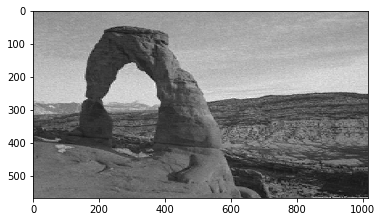

In [182]:
plt.imshow(Z, cmap = 'gray')

Dla chętnych: można analogiczną rekonstrukcję zrobić dla bazy mnist traktując cały obraz jako wektor

In [9]:
#TODO